In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Owner\Anaconda3\envs\vc\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Owner\Anaconda3\envs\vc\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Owner\Anaconda3\envs\vc\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Owner\Anaconda3\envs\vc\lib\site-packages\tensorflow\python\framework\dty

In [2]:
# one_hot 옵션은 레이블을 동물 분류 예제에서 보았던 one_hot 방식의 데이터로 만들어줍니다.
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


저장된 checkpoint가 있습니다.
INFO:tensorflow:Restoring parameters from ./model\mnist_model-6
Epoch: 0007 Avg.cost = {:.3f} 0.04461388130418279
모델 저장
Epoch: 0008 Avg.cost = {:.3f} 0.042449992015449835
모델 저장
Epoch: 0009 Avg.cost = {:.3f} 0.03736557744168253
모델 저장
Epoch: 0010 Avg.cost = {:.3f} 0.031750266421797936
모델 저장
최적화 완료
정확도 : 0.9803


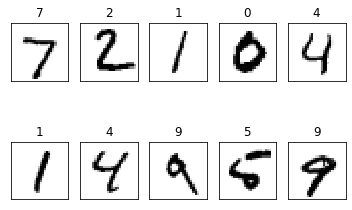

In [3]:
# 신경망 모델 구성
# data-> model -> cost / optimizer
# 28 x 28

global_step = tf.Variable(0, trainable=False, name='global_step')
X=tf.placeholder(tf.float32,[None,784])
# [1 0 0 0 0 0 0 0]
Y=tf.placeholder(tf.float32,[None,10])

# dropout parameter
keep_prob=tf.placeholder(tf.float32)

# 신경망의 레이어는 다음처럼 구성
# 784 -> 256 -> 256 -> 10
W1=tf.Variable(tf.random_normal([784,256],stddev=0.01))
L1=tf.nn.relu(tf.matmul(X,W1))
L1=tf.nn.dropout(L1,keep_prob)

W2=tf.Variable(tf.random_normal([256,256],stddev=0.01))
L2=tf.nn.relu(tf.matmul(L1,W2))
L2=tf.nn.dropout(L2,keep_prob)

W3=tf.Variable(tf.random_normal([256,10],stddev=0.01))
model=tf.matmul(L2,W3)

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model,labels=Y))
optimizer=tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost,global_step=global_step)

# 신경망 모델 학습
batch_size=100
total_batch=int(mnist.train.num_examples/batch_size)

with tf.Session() as sess:
    
    # 모델 저장
    saver=tf.train.Saver(tf.global_variables())
    ckpt=tf.train.get_checkpoint_state('./model')
    if ckpt and  tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
        print("저장된 checkpoint가 있습니다.")
        sess.run(tf.global_variables_initializer())
        # 마지막 파일 명에서 저장된 STEP 받아오기
        global_step = int(ckpt.model_checkpoint_path.split('-')[1].split('.')[0])
        saver.restore(sess,ckpt.model_checkpoint_path)
        #saver.restore(sess, tf.train.latest_checkpoint('./') )
        
    else:
        print("저장된 checkpoint가 없습니다.")
        sess.run(tf.global_variables_initializer())
        global_step=0
        
    for epoch in range(global_step,10):
        total_cost=0
        
        for i in range(total_batch):
            batch_xs,batch_ys=mnist.train.next_batch(batch_size)
            
            _,cost_val=sess.run([optimizer,cost],feed_dict={X:batch_xs, Y:batch_ys,keep_prob:0.8})
            total_cost+=cost_val
            
        print('Epoch:' , '%04d' %(epoch+1), 'Avg.cost =','{:.3f}',format(total_cost/total_batch))
        print("모델 저장")
        #if (epoch+1)%5==0:
        saver.save(sess,"./model/mnist_model",global_step=epoch)
        
    print("최적화 완료")
    # 결과 확인
    is_correct=tf.equal(tf.argmax(model,1), tf.argmax(Y,1))
    accuracy=tf.reduce_mean(tf.cast(is_correct, tf.float32))
    print('정확도 :',sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels,keep_prob:1}))
    
    
        #########
    # 결과 확인 (matplot)
    ######
    labels = sess.run(model,
                      feed_dict={X: mnist.test.images,
                                 Y: mnist.test.labels,
                                 keep_prob: 1})

    fig = plt.figure()
    for i in range(10):
        subplot = fig.add_subplot(2, 5, i + 1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        # 예측값
        subplot.set_title('%d' % np.argmax(labels[i]))
        # 정답값
        subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                       cmap=plt.cm.gray_r)

    plt.show()
        
        

